# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: [Matt Hanson](https://github.com/matthewellishanson/wmnlp-materials-web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import pickle
import requests

def fetch_data(url):
    """Fetch html content from a given URL, then pickle it."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        data = response.text
        
        # Pickle the data
        with open('data.pkl', 'wb') as file:
            pickle.dump(data, file)
        
        print("Data fetched and pickled successfully.")
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

fetch_data('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

Data fetched and pickled successfully.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
# read in the pickled data and print it 
# .get_text() is used to get the HTML content

from bs4 import BeautifulSoup
def read_and_print_text():
    """Read the pickled HTML and print the plain text."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        print(soup.get_text())
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")
read_and_print_text()


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Load the HTML article text into a trained spacy pipeline
# Return the 5 most frequent tokens (lowercase, no punctuation, no stop words, no whitespace) 
# print the tokens and their frequencies

import spacy
def process_text():
    """Process the text with spaCy and return the 5 most frequent tokens."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        text = soup.get_text()
        
        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(text)
        
        # Create a frequency dictionary for tokens
        token_freq = {}
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                token_freq[token.text.lower()] = token_freq.get(token.text.lower(), 0) + 1
        
        # Get the 5 most frequent tokens
        most_frequent_tokens = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:5]
        
        for token, freq in most_frequent_tokens:
            print(f"{token}: {freq}")
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")
process_text()

comment: 135
report: 105
laser: 51
headlights: 49
light: 42


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Use spacy pipeline to determine the 5 most frequent lemmas in the text
def process_lemmas():
    """Process the text with spaCy and return the 5 most frequent lemmas."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        text = soup.get_text()
        
        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(text)
        
        # Create a frequency dictionary for lemmas
        lemma_freq = {}
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                lemma_freq[token.lemma_.lower()] = lemma_freq.get(token.lemma_.lower(), 0) + 1
        
        # Get the 5 most frequent lemmas
        most_frequent_lemmas = sorted(lemma_freq.items(), key=lambda x: x[1], reverse=True)[:5]
        
        for lemma, freq in most_frequent_lemmas:
            print(f"{lemma}: {freq}")
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")

process_lemmas()

comment: 135
report: 105
laser: 51
headlights: 49
light: 42


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
def score_sentence_by_token(sentence, interesting_token):
    """Score a sentence based on the number of times that any interesting tokens appear in it, divided by the number of tokens in the sentence."""
    tokens = sentence.split()
    interesting_tokens = interesting_token.split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens) / len(tokens)
    return score

# Example usage of the scoring function
sentence = "Laser headlights are a fascinating technology that uses lasers to produce light."
interesting_token = "laser technology"
score = score_sentence_by_token(sentence, interesting_token)
print(f"Score for the sentence: {score:.2f}")

# Now score sentence by token for interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """Score sentences based on the number of times that any interesting lemmas appear in it, divided by the number of tokens in the sentence."""
    tokens = sentence.split()
    interesting_lemmas_set = set(interesting_lemmas)
    score = sum(1 for token in tokens if token.lower() in interesting_lemmas_set) / len(tokens)
    return score

# Example usage of the scoring function for the 5 most frequent lemmas
interesting_lemmas = ["laser", "headlight", "technology", "produce", "fascinate"]
sentence = "Laser headlights are a fascinating technology that uses lasers to produce light."
score = score_sentence_by_lemma(sentence, interesting_lemmas)
print(f"Score for the sentence by lemmas: {score:.2f}")

# Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified

def test_scores():
    """Test the scoring functions with the first sentence of the article."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        text = soup.get_text()
        
        # Get the first sentence
        first_sentence = text.split('.')[0] + '.'
        
        # Score by token
        interesting_token = "laser technology"
        score_token = score_sentence_by_token(first_sentence, interesting_token)
        print(f"Score for the first sentence by token: {score_token:.2f}")
        
        # Score by lemma
        interesting_lemmas = ["laser", "headlight", "technology", "produce", "fascinate"]
        score_lemma = score_sentence_by_lemma(first_sentence, interesting_lemmas)
        print(f"Score for the first sentence by lemmas: {score_lemma:.2f}")
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")
test_scores()

Score for the sentence: 0.17
Score for the sentence by lemmas: 0.25
Score for the first sentence by token: 0.07
Score for the first sentence by lemmas: 0.07


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

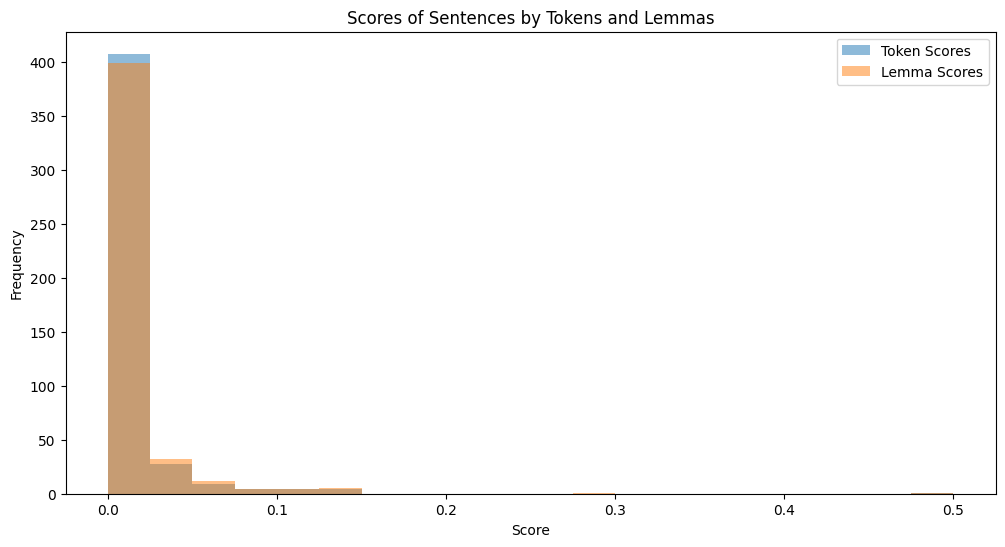

In [8]:
# get the scores of every sentence in the article using the frequent tokens and frequent lemmas identified
# plot the scores for each sentence in a histogram
def score_all_sentences():
    """Score all sentences in the article using the frequent tokens and lemmas.
        Plot the scores for each sentence in a histogram."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        text = soup.get_text()
        
        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(text)
        
        # Get sentences from the document
        sentences = [sent.text for sent in doc.sents]
        
        # Score each sentence by token and lemma
        interesting_token = "laser technology"
        interesting_lemmas = ["laser", "headlight", "technology", "produce", "fascinate"]
        
        token_scores = [score_sentence_by_token(sent, interesting_token) for sent in sentences]
        lemma_scores = [score_sentence_by_lemma(sent, interesting_lemmas) for sent in sentences]
        
        # Plotting the scores (requires matplotlib)
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 6))
        plt.hist(token_scores, bins=20, alpha=0.5, label='Token Scores')
        plt.hist(lemma_scores, bins=20, alpha=0.5, label='Lemma Scores')
        plt.title('Scores of Sentences by Tokens and Lemmas')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")

    # Call the function to score all sentences and plot the histogram
score_all_sentences()
   
    

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

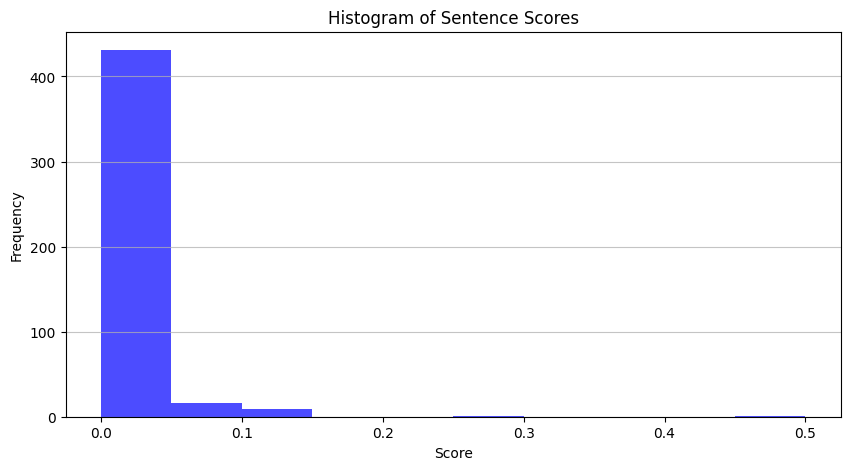

In [11]:
# Make a list containing the scores (using lemmas) of every sentence in the article, using score_all_sentences()
def get_scores():
    """Get scores of all sentences in the article using lemmas."""
    try:
        # Load the pickled HTML data
        with open('data.pkl', 'rb') as file:
            html_data = pickle.load(file)
        
        # Parse HTML and extract text
        soup = BeautifulSoup(html_data, 'html.parser')
        text = soup.get_text()
        
        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(text)
        
        # Get sentences from the document
        sentences = [sent.text for sent in doc.sents]
        
        # Score each sentence by lemma
        interesting_lemmas = ["laser", "headlight", "technology", "produce", "fascinate"]
        scores = [score_sentence_by_lemma(sent, interesting_lemmas) for sent in sentences]
        
        return scores
    except FileNotFoundError:
        print("Pickle file not found. Make sure to run fetch_data() first.")
        return []
    
# plot a histogram with appropriate titles and axis labels of the scores.  

def plot_histogram(scores):
    """Plot a histogram of the scores."""
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 5))
    plt.hist(scores, bins=10, color='blue', alpha=0.7)
    plt.title('Histogram of Sentence Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example usage of the histogram plotting function
scores = get_scores()
if scores:
    plot_histogram(scores)



# From your histogram, what seems to be the most common range of scores

# The most common range of scores seems to be between 0.0 and 0.2, indicating that many sentences have a low frequency of the interesting lemmas. This suggests that the article may not heavily focus on the identified lemmas, or that they are used in a more general context rather than being central to the content.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).
   
   ```python
   # Create a frequency dictionary for lemmas (only nouns, exclude stopwords, punctuation, whitespace)
        lemma_freq = {}
        for token in doc:
            if (
            not token.is_stop
            and not token.is_punct
            and not token.is_space
            and token.pos_ == "NOUN"
            ):
            lemma_freq[token.lemma_.lower()] = lemma_freq.get(token.lemma_.lower(), 0) + 1
   ```

   ```python
        # Create a frequency dictionary for tokens, only for nouns and exclude stop words, punctuation, and whitespace
        token_freq = {}
        for token in doc:
            if (
            not token.is_stop
            and not token.is_punct
            and not token.is_space
            and token.pos_ == "NOUN"
            ):
                token_freq[token.text.lower()] = token_freq.get(token.text.lower(), 0) + 1
   ```

   Through this modification, the most frequent tokens become: 
    - comment: 135
    - report: 105
    - laser: 51
    - headlights: 49
    - light: 42

